## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%%timeit
from Multiworker_Contract import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p)
(mwc_J,mwc_W,mwc_Wstar)=mwc.J()

(100,)
Ji shape (7, 2, 2, 100)
W1i shape (7, 2, 2, 100, 2)


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:169: RuntimeWarning: divide by zero encountered in power
  return np.divide(aa * np.power( wage, self.p.tax_lambda * (1.0 - self.p.u_rho)) - self.p.u_b,
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\valuefunction_multi.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  self.rsqr[iz, in0, in1] = res2.fun / np.power(J1[iz, in0, in1, :],2).mean()
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\valuefunction_multi.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  self.rsqr[iz, in0, in1] = res2.fun / np.power(J1[iz, in0, in1, :],2).mean()
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\valuefunction_multi.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  self.rsqr[iz, in0, in1] = res2.fun / np.power(J1[iz, in0, in1, :],2).mean()
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\valuefunction_multi.py:

pj_last [[ 1.50033075e-05 -9.87979944e-01 -9.19324194e-01 -1.29588408e+00
   1.93709867e+00]
 [ 1.96729619e-05 -9.86391101e-01 -8.87348069e-01 -1.25223011e+00
   1.93709867e+00]
 [ 2.43463478e-05 -9.85262789e-01 -8.57485668e-01 -1.25452568e+00
   1.93709867e+00]
 [ 2.31094158e-05 -9.86739398e-01 -8.39063591e-01 -1.46853191e+00
   1.93709867e+00]
 [ 2.20622756e-05 -9.88340002e-01 -8.20976045e-01 -1.67962195e+00
   1.93709867e+00]
 [ 2.13773537e-05 -9.89865439e-01 -8.02098740e-01 -1.88651007e+00
   1.93709867e+00]
 [ 2.77230309e-05 -9.88553276e-01 -7.67612481e-01 -1.88984505e+00
   1.93709867e+00]]
Errors: nan 2.5440140127440647 nan 1.001619579869977 1


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\valuefunction_multi.py:168: RuntimeWarning: invalid value encountered in divide
  W = W / W.sum()


pj_last [[ 0.          0.         -0.91932419 -1.29588408  3.89660085]
 [ 0.          0.         -0.88734807 -1.25223011  3.89660085]
 [ 0.          0.         -0.85748567 -1.25452568  3.89660085]
 [ 0.          0.         -0.83906359 -1.46853191  3.89660085]
 [ 0.          0.         -0.82097604 -1.67962195  3.89660085]
 [ 0.          0.         -0.80209874 -1.88651007  3.89660085]
 [ 0.          0.         -0.76761248 -1.88984505  3.89660085]]


AssertionError: 

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi)=cc.J()

Z_grid: [0.31652616 0.50941628 0.72713773 1.         1.37525527 1.96303108
 3.15929651]
fun_prod: [ 5.06441859  8.15066054 11.63420375 16.         22.0040843  31.40849735
 50.54874421]
(100,)
rho_star [[1.11807221e-02 4.19165172e-01 1.10709112e+00 1.98652926e+00
  3.02224457e+00 4.19344268e+00 5.48594715e+00 6.88928483e+00
  8.39530638e+00 9.99743502e+00 1.16902172e+01 1.34690350e+01
  1.53299119e+01 1.72693772e+01 1.92843665e+01 2.13721484e+01
  2.35302680e+01 2.57565034e+01 2.80488309e+01 3.04053971e+01
  3.28244963e+01 3.53045520e+01 3.78441012e+01 4.04417815e+01
  4.30963200e+01 4.58065238e+01 4.85712724e+01 5.13895101e+01
  5.42602403e+01 5.71825203e+01 6.01554560e+01 6.31781988e+01
  6.62499410e+01 6.93699131e+01 7.25373808e+01 7.57516423e+01
  7.90120260e+01 8.23178884e+01 8.56686124e+01 8.90636050e+01
  9.25022965e+01 9.59841384e+01 9.95086024e+01 1.03075179e+02
  1.06683377e+02 1.10332722e+02 1.14022754e+02 1.17753031e+02
  1.21523122e+02 1.25332611e+02 1.29181095e+02 1.330681

In [4]:
J_deriv=    np.zeros_like(mwc_J)
            # First boundary condition: forward difference
J_deriv[:, :, 0, :] = mwc_J[:, :, 1, :] - mwc_J[:, :, 0, :]
            #print("1st part", Jderiv1)

            # Last boundary condition: backward difference
J_deriv[:, :, -1, :] = mwc_J[:, :, -1, :] - mwc_J[:, :, -2, :]
            #print("2nd part", Jderiv1)

            # Central differences: average of forward and backward differences
J_deriv[:, :, 1:-1, :] = (mwc_J[:, :, 2:, :] - mwc_J[:, :, 1:-1, :] + mwc_J[:, :, 1:-1, :] - mwc_J[:, :, :-2, :]) / 2

# Plots

In [5]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

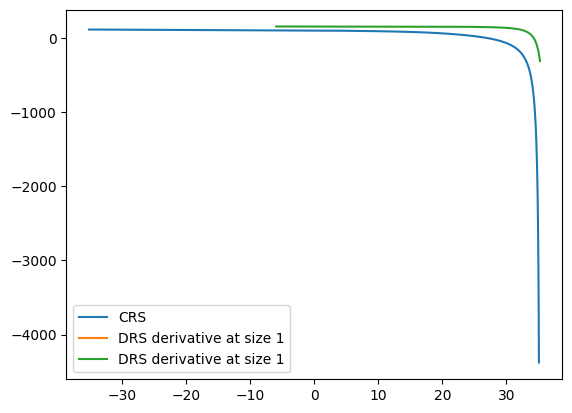

In [6]:
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='CRS')
plt.plot(mwc_W[p.z_0-1, 0, 1, :], J_deriv[p.z_0-1, 0, 1, :], label='DRS derivative at size 1')
plt.legend()
plt.show()

Text(0, 0.5, 'Value change over time')

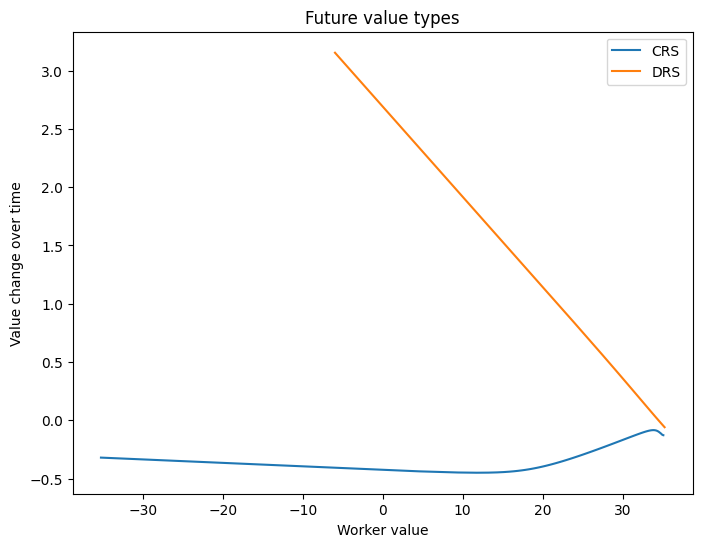

In [7]:
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_Wstar[p.z_0-1, :]-cc_W[p.z_0-1, :], label='CRS')
plt.plot(mwc_W[p.z_0-1, 0, 1,:, 1], mwc_Wstar[p.z_0-1, 0, 1, :]-mwc_W[p.z_0-1, 0, 1,:, 1], label='DRS')
plt.legend()
# Add titles and labels
plt.title('Future value types')
plt.xlabel('Worker value')
plt.ylabel('Value change over time')

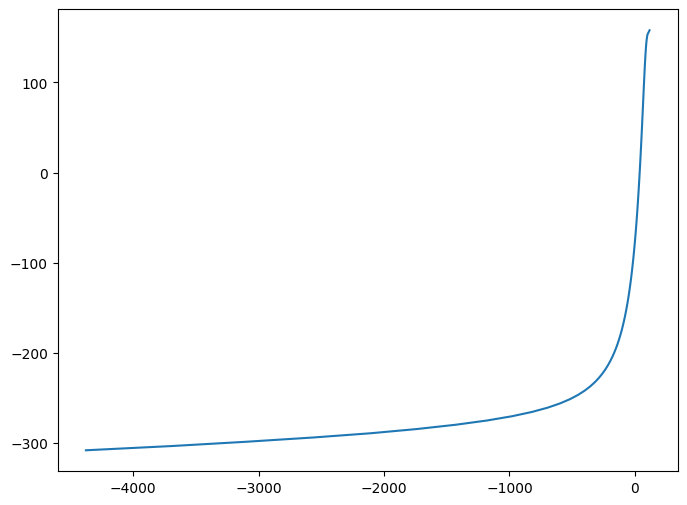

In [8]:
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_J[p.z_0-1, :], mwc_J[p.z_0-1, 0, 1, :], label='CRS vs DRS')

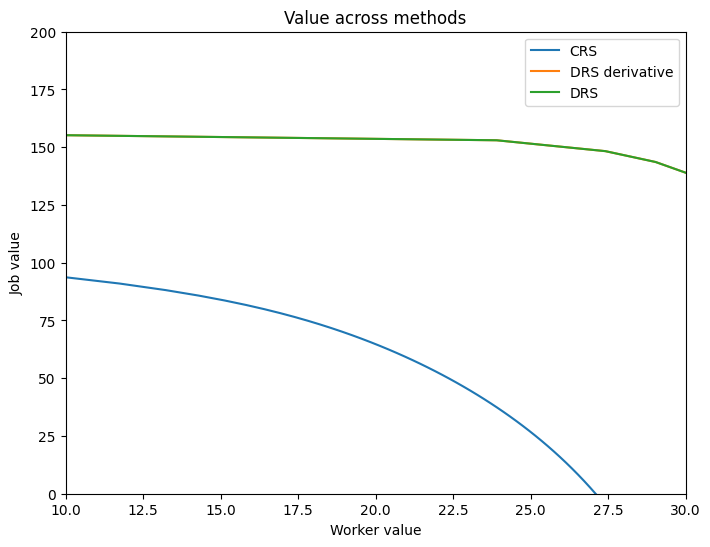

In [9]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='CRS')
plt.plot(mwc_W[p.z_0-1, 0, 1, :, 1], J_deriv[p.z_0-1, 0, 1, :], label='DRS derivative')
plt.plot(mwc_W[p.z_0-1, 0, 1, :, 1], mwc_J[p.z_0-1, 0, 1, :], label='DRS')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value CRS vs DRS.png'), bbox_inches='tight')  # Save as PNG


# Optionally set x and y limits
plt.xlim([10, 30])
plt.ylim([0, 200])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value CRS vs DRS zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

In [23]:
mwc.sum_size[0,1,0,0]

1.0

In [38]:
mwc.w_grid[10]*mwc.sum_size[0,2,1,10]
mwc.sum_wage[0,0,2,10]

10.301766506968955

In [14]:
np.log(mwc.w_grid[99])/(1-p.beta)

78.4587620523157

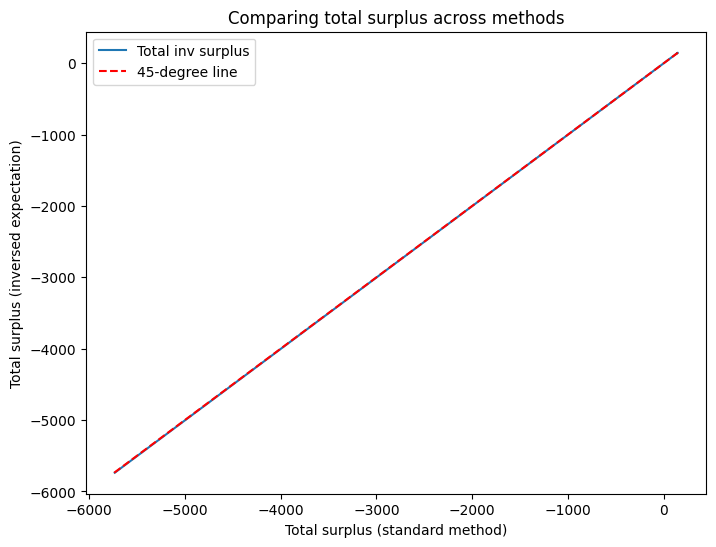

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], mwc_W[p.z_0-1, 0, 1,:]+J_deriv[p.z_0-1, 0, 1, :], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = mwc_W[p.z_0-1, 0, 1,:] + J_deriv[p.z_0-1, 0, 1, :]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()